In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


In [2]:
heartdisease_df = pd.read_csv('heart.csv')

In [3]:
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [6]:
kmeans_küme = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_küme.fit(X_std)
y_pred = kmeans_küme.predict(X_std)

17.1 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


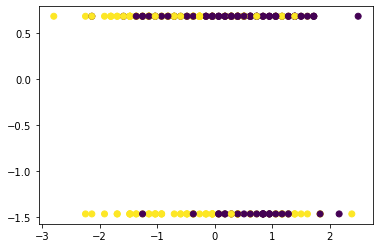

In [7]:
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

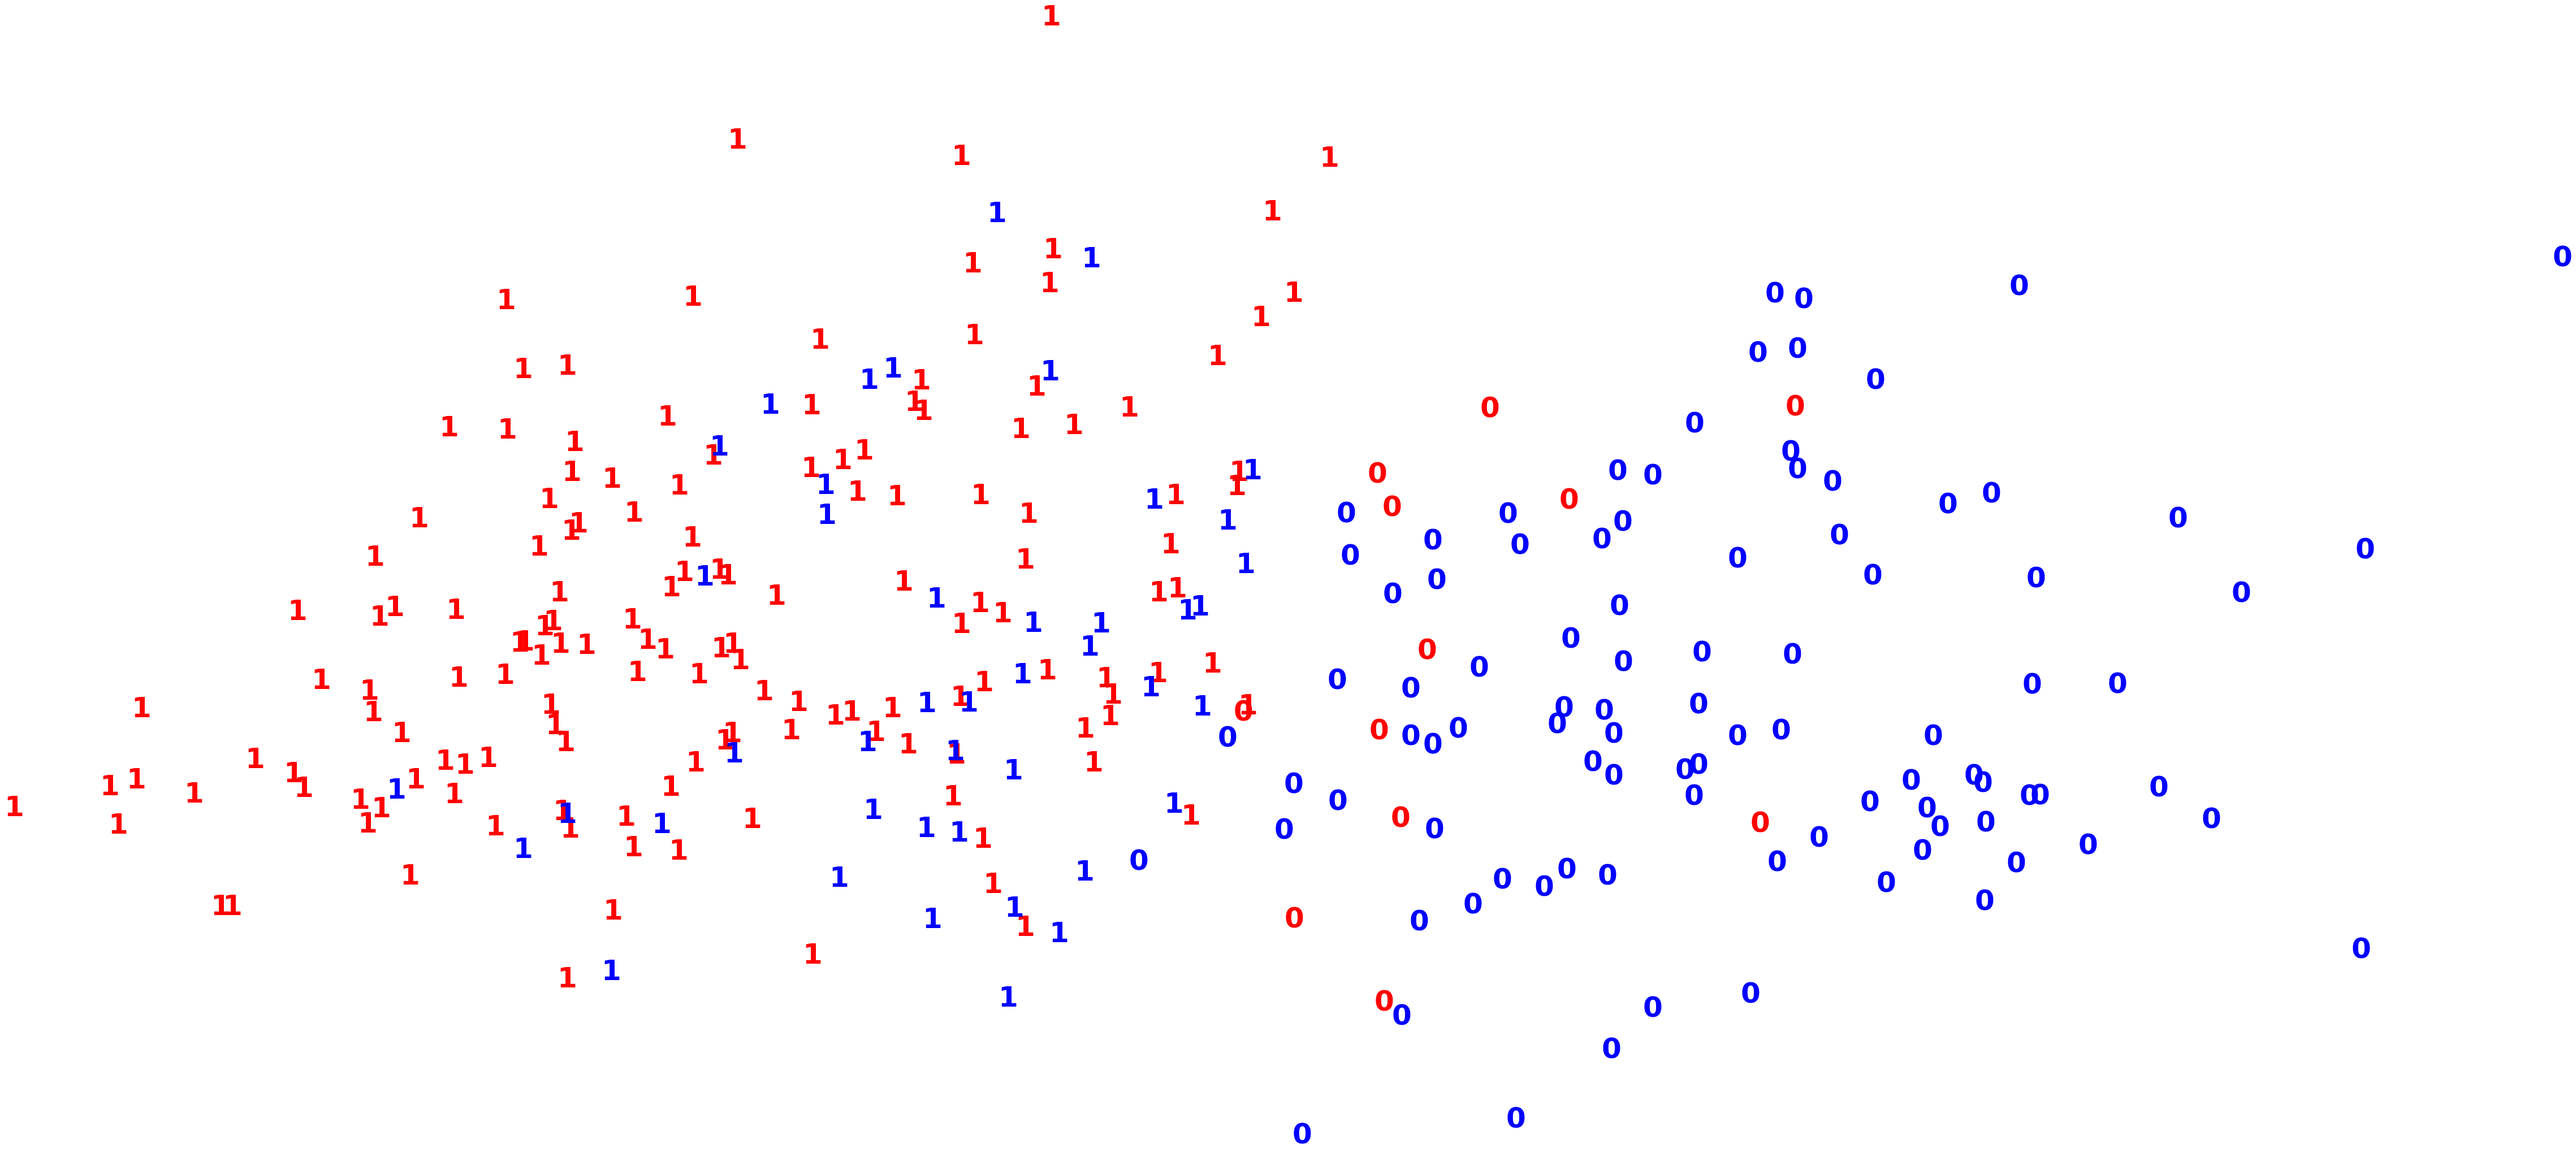

In [11]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

18.5 ms ± 590 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


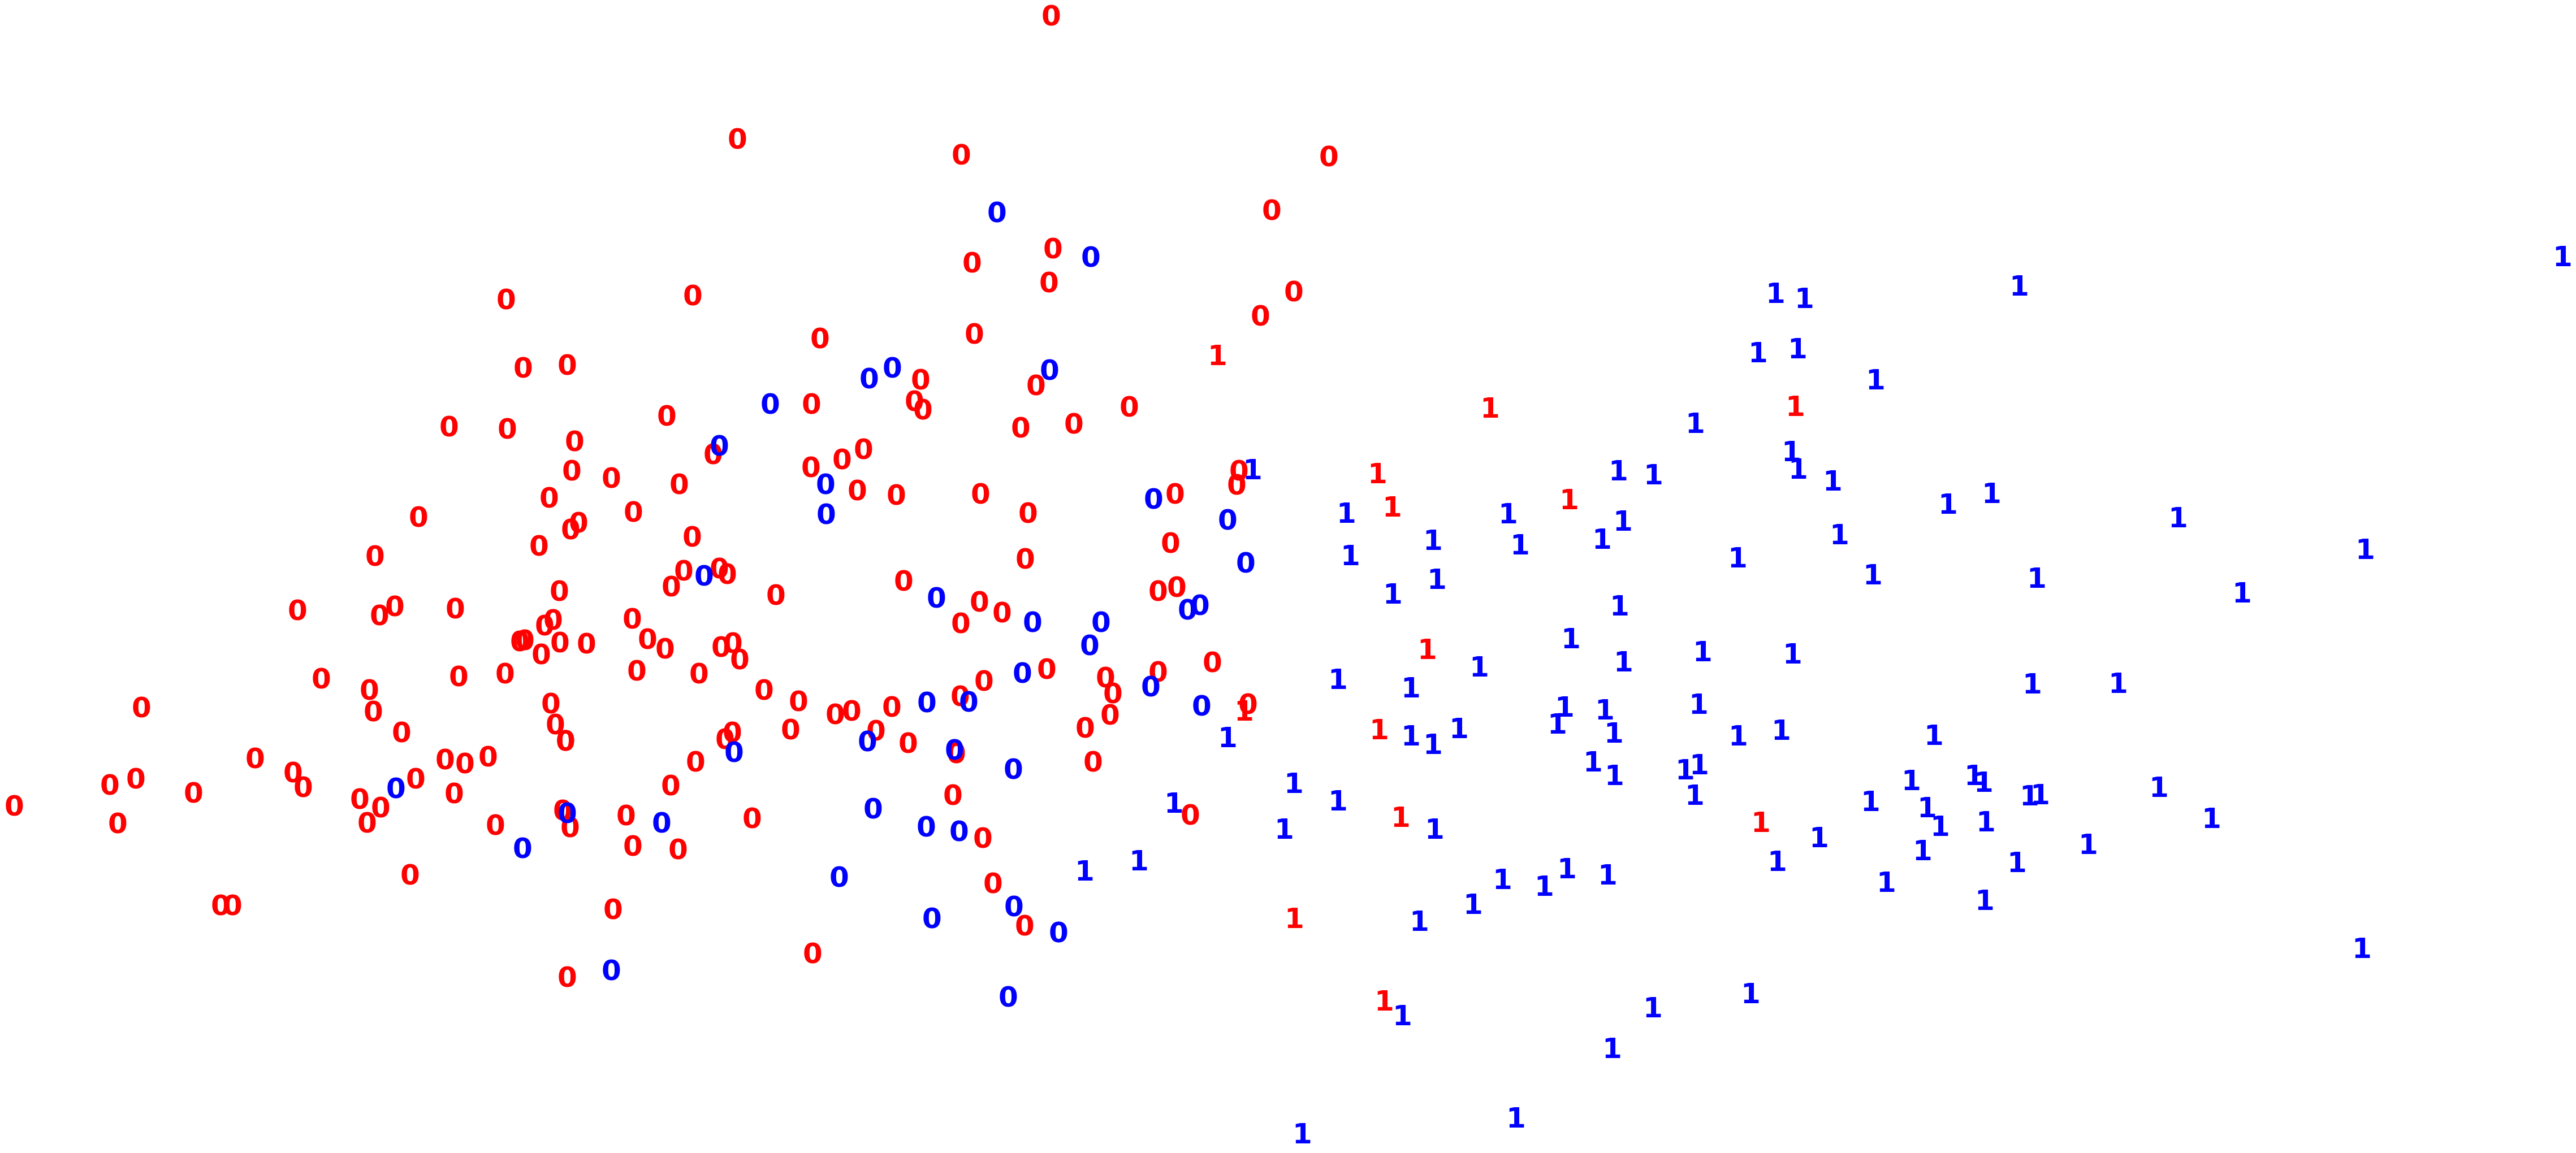

In [13]:
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**İki yöntemde de sonuçlar hemen hemen aynı.KMeans , MiniBatchKMeans'e göre bir tık daha hızlı çalıştı.**